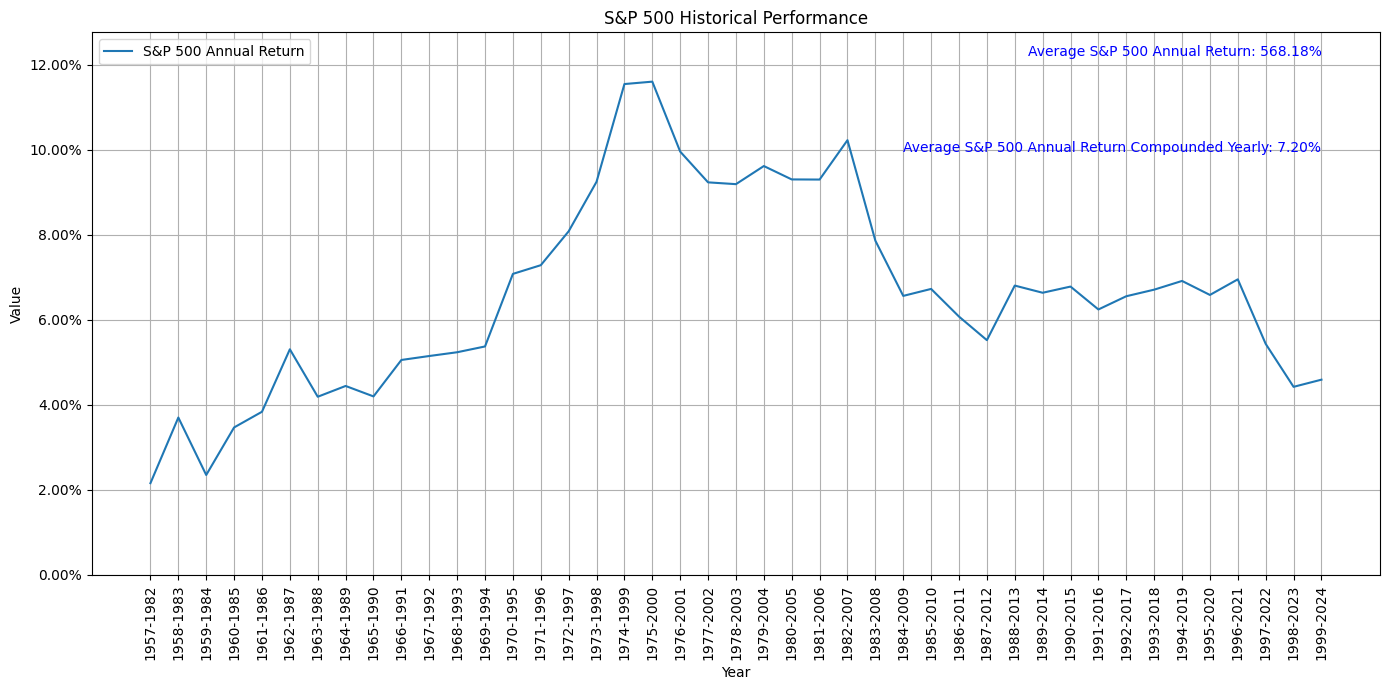

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data1 = pd.read_csv('new_S&P500-raw_prices.csv')
data1 = data1[['Price', 'Close']]
data1 = data1.iloc[2:]
data1['Price'] = pd.to_datetime(data1['Price'])
data1.set_index('Price', inplace=True)
full_date_range = pd.date_range(start=data1.index.min(), end=data1.index.max(), freq='D')
data1 = data1.reindex(full_date_range)
data1.ffill(inplace=True)
data1.reset_index(inplace=True)
data1.rename(columns={'index': 'Date'}, inplace=True)
data1.rename(columns={'Close': 'S&P500'}, inplace=True)

data1['S&P500'] = pd.to_numeric(data1['S&P500'], errors='coerce')

def RILAcapBuffer(data, start_year, end_year, typef, duration):

    startyear = start_year
    # Set index and convert date column to datetime
    data.set_index('Date', inplace=True)
    data.reset_index(inplace=True)
    data.rename(columns={'index': 'Date'}, inplace=True)
    data['Date'] = pd.to_datetime(data['Date'])

    start_year = startyear  # Reset start_year to its initial value
    yearList = []
    CAGR = []
    while start_year + duration <= end_year:
        endYear = start_year + duration
        yearList.append(f"{start_year}-{endYear}")
        CurYearData = data[data['Date'].dt.year == start_year]
        CurYearData.reset_index(inplace=True)
        CurYearData = CurYearData['S&P500']
        NextYearData = data[data['Date'].dt.year == endYear]
        NextYearData.reset_index(inplace=True)
        NextYearData = NextYearData['S&P500']
        totalInc = 0
        for i in range(0, len(CurYearData) - 1):
            inc = ((NextYearData[i] / CurYearData[i]) - 1) * 100
            totalInc += inc
        CAGR.append(totalInc / len(NextYearData))
        start_year += 1


    # Plot results
    plt.figure(figsize=(14, 7))

    avg_CAGR = np.mean(CAGR)
    CompoundedCAGR = [(value/100) ** (1/25) - 1 for value in CAGR]
    avg_yearlyCAGR = ((np.mean(CAGR)/ 100) ** (1/25) - 1) * 100
    ymax = np.max(CompoundedCAGR) * 1.1
    # ymin = np.min(np.min(CompoundedCAGR), 0)
    ymin = 0
    comp = (ymax - ymin) / 20

    #for i, txt in enumerate(CAGR):
    #    curdif = CAGR[i] - RILA[i]
    #    if curdif > 0 and curdif < comp:
    #        plt.text(yearList[i], CAGR[i], f'{txt:.2f}%', ha='center', va='bottom', fontsize=8)
    #    elif curdif < 0 and curdif > - comp:
    #        plt.text(yearList[i], CAGR[i], f'{txt:.2f}%', ha='center', va='bottom', fontsize=8)
    #    else:
    #        plt.text(yearList[i], CAGR[i], f'{txt:.2f}%', ha='center', va='bottom', fontsize=8)
    #for i, txt in enumerate(RILA):
    #    curdif = CAGR[i] - RILA[i]
    #    if curdif > 0 and curdif < comp:
    #        plt.text(yearList[i], CAGR[i] - comp, f'{txt:.2f}%', ha='center', va='bottom', fontsize=8)
    #    elif curdif < 0 and curdif > - comp:
    #        plt.text(yearList[i], CAGR[i] + comp, f'{txt:.2f}%', ha='center', va='bottom', fontsize=8)
    #    else:
    #        plt.text(yearList[i], RILA[i], f'{txt:.2f}%', ha='center', va='bottom', fontsize=8)

    # Add labels for RILA
    # for i, txt in enumerate(RILA):
    #     curdif = RILA[i] - comp[i]
    #     plt.text(yearList[i], RILA[i], f'{txt:.2f}%', ha='center', va='bottom', fontsize=8)

    #if cap >= 50:
    #    plt.text(yearList[-1], ymax - 7 * comp, f'Note: IUL Cap: Unlimited, Buffer: {buffer*100:.2f}%', color='blue', ha='right', va='bottom', fontsize=10)
    #else:
    #    plt.text(yearList[-1], ymax - 7 * comp, f'Note: IUL Cap: {cap*100:.2f}%, Buffer: {buffer*100:.2f}%', color='blue', ha='right', va='bottom', fontsize=10)

    plt.title(f'{typef} Historical Performance')
    plt.plot(yearList, CompoundedCAGR, label=f'{typef} Annual Return')
    #plt.plot(yearList, RILA, label=f'IUL Return-{typef} Annual point to point')
    plt.text(yearList[-1], ymax - comp, f'Average {typef} Annual Return: {avg_CAGR:.2f}%', color='blue', ha='right', va='bottom', fontsize=10)
    #plt.text(yearList[-1], ymax - 8 * comp, f'Participation Rate: {participationRate*100:.2f}%', color='blue', ha='right', va='bottom', fontsize=10)
    #plt.text(yearList[-1], ymax - 2 * comp, f'Average {typef} IUL Return: {avg_RILAout:.2f}%', color='orange', ha='right', va='top', fontsize=10)
    #plt.text(yearList[-1], ymax - 5 * comp, f'Average {typef} IUL Return Compounded Yearly: {avg_yearlyRILAout:.2f}%', color='orange', ha='right', va='top', fontsize=10)
    plt.text(yearList[-1], ymax - 4 * comp, f'Average {typef} Annual Return Compounded Yearly: {avg_yearlyCAGR:.2f}%', color='blue', ha='right', va='top', fontsize=10)

    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.xticks(rotation=90)
    plt.legend()
    plt.grid(True)
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x * 100:.2f}%'))
    plt.ylim(ymin, ymax)
    plt.tight_layout()  # Adjust layout to make room for x-axis labels
    plt.show()

    CAGR = [f"{value:.2f}%" for value in CAGR]
    CompoundedCAGR = [f"{value * 100:.2f}%" for value in CompoundedCAGR]
    newData = {
            "Year List": yearList,
            f"Average {typef} Return": CAGR,
            f"Average {typef} Annual Return": CompoundedCAGR,
            f'Compounded Average {typef} Annual Return': [f'{avg_yearlyCAGR:.2f}%'] + [""] * (len(CAGR)-1),
    }
    df = pd.DataFrame(newData)
    df.to_excel(typef + ' Historical Return.xlsx', engine='openpyxl', index=False)

RILAcapBuffer(data1, 1957, 2024,'S&P 500', 25)

C:\Users\20537\AppData\Local\Temp\ipykernel_40164\1649429555.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


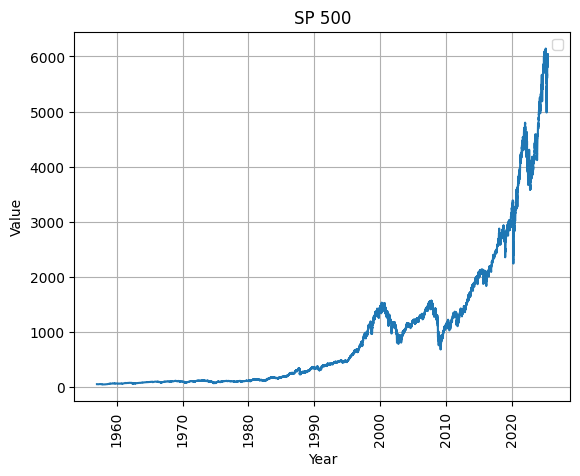

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data1 = pd.read_csv('new_S&P500-raw_prices.csv')
data1 = data1[['Price', 'Close']]
data1 = data1.iloc[2:]
data1['Price'] = pd.to_datetime(data1['Price'])
data1.set_index('Price', inplace=True)
full_date_range = pd.date_range(start=data1.index.min(), end=data1.index.max(), freq='D')
data1 = data1.reindex(full_date_range)
data1.ffill(inplace=True)
data1.reset_index(inplace=True)
data1.rename(columns={'index': 'Date'}, inplace=True)
data1.rename(columns={'Close': 'S&P500'}, inplace=True)

data1['S&P500'] = pd.to_numeric(data1['S&P500'], errors='coerce')
data1.set_index('Date', inplace=True)
data1.reset_index(inplace=True)
data1.rename(columns={'index': 'Date'}, inplace=True)
data1['Date'] = pd.to_datetime(data1['Date'])
 
plt.title('SP 500')
plt.plot(data1['Date'], data1['S&P500'])
plt.xlabel('Year')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
newData = {
            f"Date": data1['Date'],
            f"Index": data1['S&P500'],
}
df = pd.DataFrame(newData)
df.to_excel('SP 500 data.xlsx', engine='openpyxl', index=False)

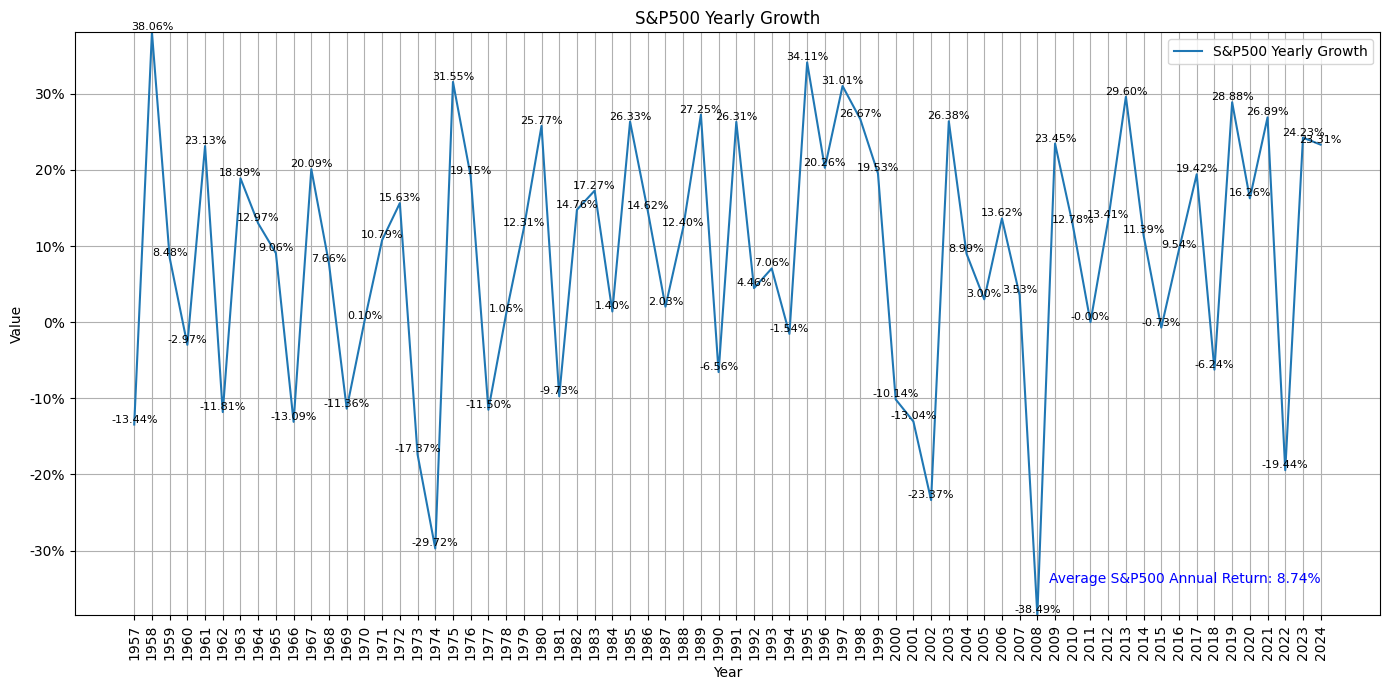

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def yearReturn(data, start_year, end_year):

    startyear = start_year
    # Set index and convert date column to datetime
    data.set_index('Date', inplace=True)
    data.reset_index(inplace=True)
    data.rename(columns={'index': 'Date'}, inplace=True)
    data['Date'] = pd.to_datetime(data['Date'])

    RTN = []
    RTNnew = []
    yearList = []

    while start_year <= end_year:
        CurYearData = data[data['Date'].dt.year == start_year]
        CurYearData.reset_index(inplace=True)
        CurYearData = CurYearData['S&P500']

        inc = (CurYearData[len(CurYearData) - 1] - CurYearData[0]) / CurYearData[0]
        
        RTN.append(inc * 100)
        RTNnew.append(inc)

        yearList.append(f"{start_year}")
        start_year += 1

    start_year = startyear

    # Plot results
    plt.figure(figsize=(14, 7))

    ymax = np.max(RTN)
    ymin = np.min(RTN)
    comp = (ymax - ymin)/20
    avg_RTN = np.mean(RTN)

    plt.title(f'S&P500 Yearly Growth')
    plt.plot(yearList, RTN, label=f'S&P500 Yearly Growth')
    plt.text(yearList[-1], ymin + comp, f'Average S&P500 Annual Return: {avg_RTN:.2f}%', color='blue', ha='right', va='bottom', fontsize=10)
    for i, txt in enumerate(RTN):
        plt.text(yearList[i], RTN[i], f'{txt:.2f}%', ha='center', va='bottom', fontsize=8)

    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.xticks(rotation=90)
    plt.legend()
    plt.grid(True)
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))
    plt.ylim(ymin, ymax)
    plt.tight_layout()  # Adjust layout to make room for x-axis labels
    plt.show()

    newData = {
        "Year List": yearList,
        f"S&P500 Yearly Growth": RTNnew,
        "Average Growth Rate": [f'{avg_RTN/100:.4f}'] + [''] * (len(RTN)-1),
    }
    df = pd.DataFrame(newData)
    df.to_excel('YearReturn.xlsx', engine='openpyxl', index=False)


data1 = pd.read_csv('new_S&P500-raw_prices.csv')
data1 = data1[['Price', 'Close']]
data1 = data1.iloc[2:]
data1['Price'] = pd.to_datetime(data1['Price'])
data1.set_index('Price', inplace=True)
full_date_range = pd.date_range(start=data1.index.min(), end=data1.index.max(), freq='D')
data1 = data1.reindex(full_date_range)
data1.ffill(inplace=True)
data1.reset_index(inplace=True)
data1.rename(columns={'index': 'Date'}, inplace=True)
data1.rename(columns={'Close': 'S&P500'}, inplace=True)

data1['S&P500'] = pd.to_numeric(data1['S&P500'], errors='coerce')
data1.set_index('Date', inplace=True)
data1.reset_index(inplace=True)
data1.rename(columns={'index': 'Date'}, inplace=True)
data1['Date'] = pd.to_datetime(data1['Date'])
yearReturn(data1, 1957,2024)
